In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import xesmf as xe
import cartopy
import dask
from tqdm.autonotebook import tqdm  # Fancy progress bars for our loops!
import intake
import fsspec
import requests
import aiohttp
import nc_time_axis
import cftime

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [ ]:
# df_ta_ncar = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2' & variable_id == 'tas'  & institution_id == 'NCAR'")
df_ta_ncar = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2'  & variable_id == 'tas' & institution_id == 'NCAR'")

# df_ta_ncar.experiment_id.unique()
df_ta_ncar

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
53470,CMIP,NCAR,CESM2,amip,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r1i1p1f1...,NaN,20190218
55166,CMIP,NCAR,CESM2,amip,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r3i1p1f1...,NaN,20190220
55264,CMIP,NCAR,CESM2,amip,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r2i1p1f1...,NaN,20190220
59875,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
61655,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20190308
61862,CMIP,NCAR,CESM2,historical,r5i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20190308
62691,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190308
63131,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20190308
63266,CMIP,NCAR,CESM2,historical,r6i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...,NaN,20190308
64615,CMIP,NCAR,CESM2,historical,r8i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r8...,NaN,20190311


In [ ]:
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ta_ncar.zstore.values[-1]
print(zstore)

# create a mutable-mapping-style interface to the store
mapper = fsspec.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds

gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r8i1p1f1/Amon/tas/gn/v20200226/


<xarray.Dataset>
Dimensions:    (lat: 192, nbnd: 2, lon: 288, time: 780)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1950-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(780, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(390, 192, 288), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          no parent
    branch_time_in_child:   711385.0
    branch_time_in_parent:  0.0
    case_id:                1585
    ...                     ...
    tracking_id:            hdl:21.14100/f4258deb-f368-4c6e-81a8-27083dc928cd...
    variable_id:            tas
    variant_info:           CMIP6 CESM2 AMIP hindcast (1950-2014) with intera...
    variant_label:          r8i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/f4258deb-f368-4c6e-81a8-27083dc928cd...
    version_id:             v20200226

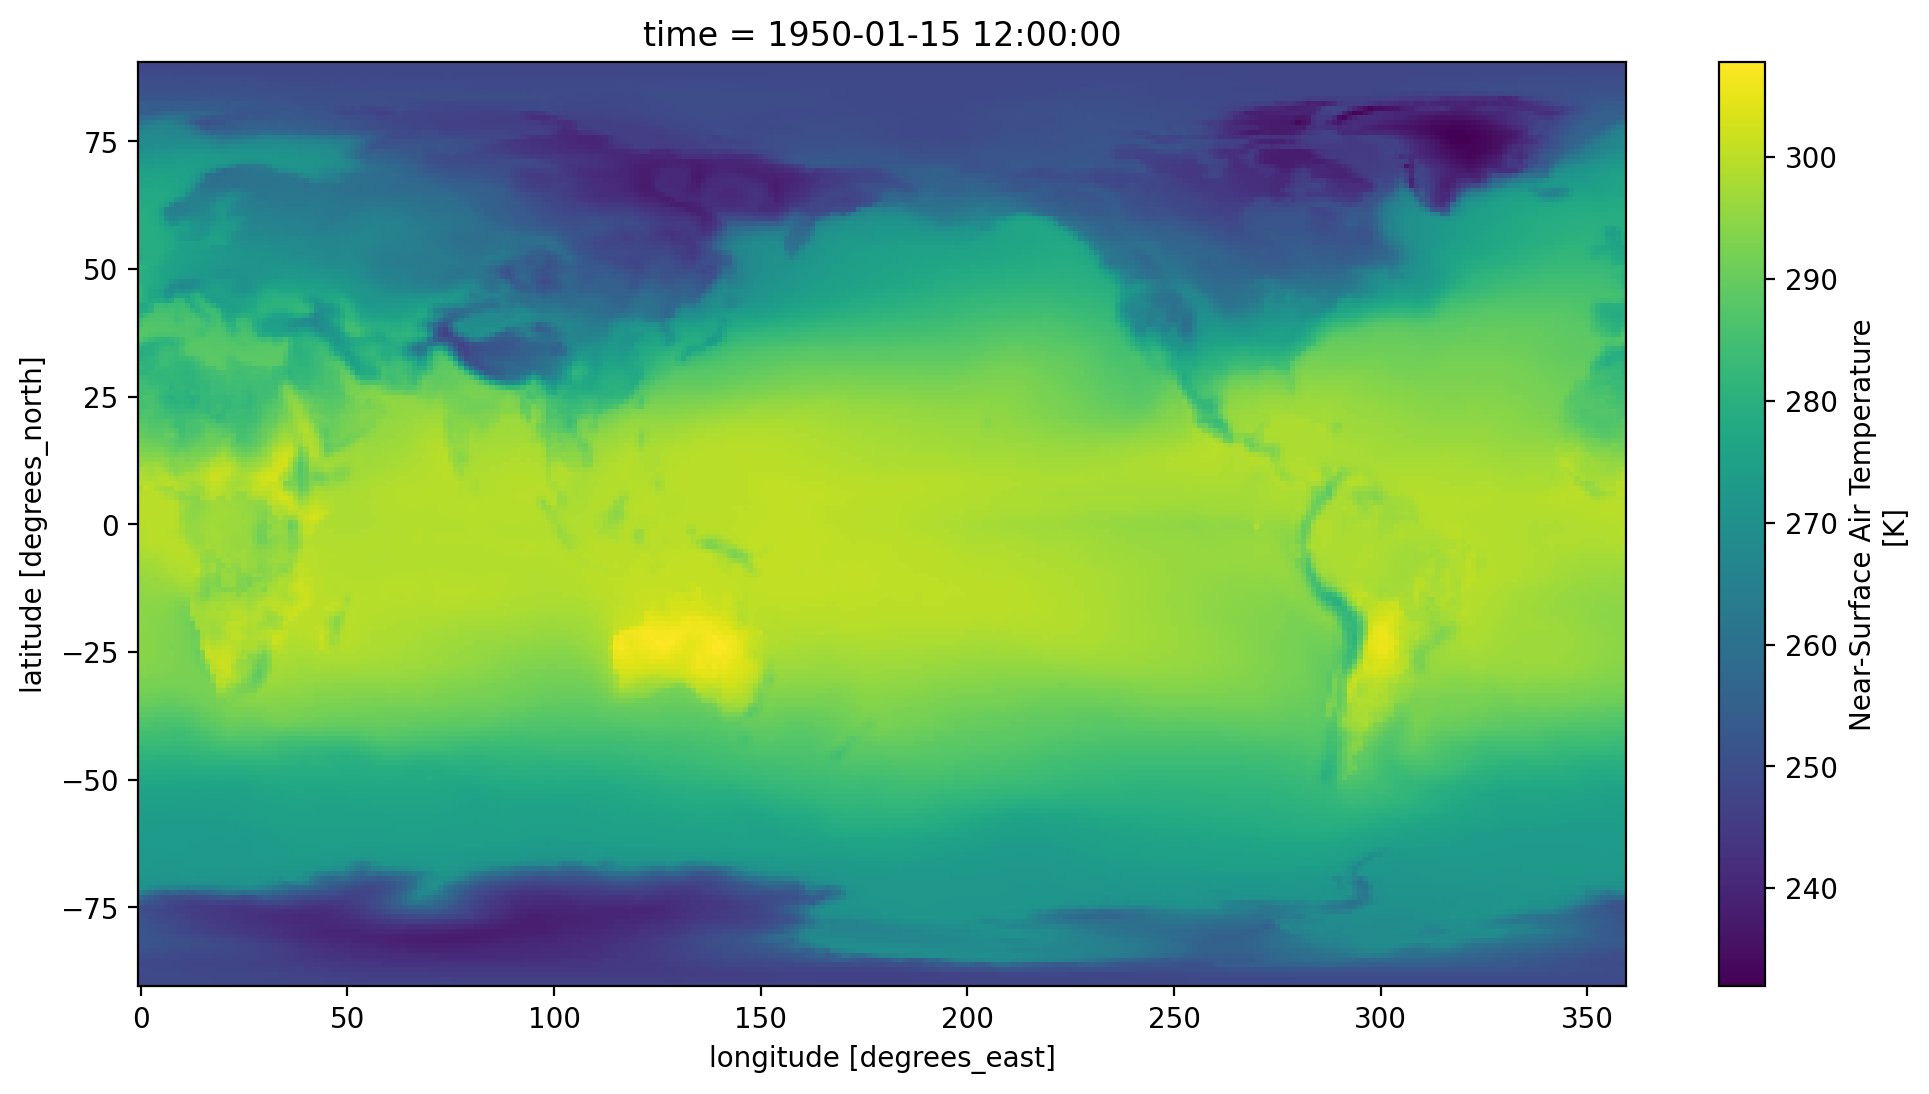

In [ ]:
ds.tas.sel(time='1950-01').squeeze().plot()

In [ ]:
df_area = df.query("variable_id == 'areacella' & source_id == 'CESM2' & experiment_id =='1pctCO2'")
df_area

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
78843,CMIP,NCAR,CESM2,1pctCO2,r1i1p1f1,fx,areacella,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/1pctCO2/r1i1p...,NaN,20190425


In [ ]:

ds_area = xr.open_zarr(fsspec.get_mapper(df_area.zstore.values[-1]), consolidated=True)
ds_area

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella  (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  182500.0
    case_id:                58
    ...                     ...
    variable_id:            areacella
    variant_info:           CMIP6 CESM2 1pctCO2 experiment with interactive a...
    variant_label:          r1i1p1f1
    status:                 2019-11-04;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/359d67ae-c12e-4c23-843e-485467d99048
    version_id:             v20190425

In [ ]:
total_area = ds_area.areacella.sum(dim=['lon', 'lat'])
ta_timeseries = (ds.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
ta_timeseries

<xarray.DataArray (time: 780)>
dask.array<truediv, shape=(780,), dtype=float32, chunksize=(390,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1950-01-15 12:00:00 ... 2014-12-15 12:00:00

In [ ]:
%time ta_timeseries.load()

CPU times: user 601 ms, sys: 357 ms, total: 958 ms
Wall time: 6.84 s


<xarray.DataArray (time: 780)>
array([285.34146, 285.10855, 285.73303, 286.84476, 287.9798 , 288.5973 ,
       288.65613, 288.59845, 288.0161 , 287.14297, 285.95212, 285.22794,
       285.03345, 285.03174, 285.5469 , 286.73898, 287.68665, 288.49646,
       288.76828, 288.69388, 288.07248, 287.18634, 286.10403, 285.29147,
       285.1974 , 285.26913, 285.87863, 287.14545, 287.95486, 288.47647,
       288.65332, 288.68228, 288.05063, 287.25204, 286.16623, 285.28372,
       285.11267, 285.24097, 286.08838, 286.7694 , 287.97437, 288.46017,
       288.7477 , 288.69888, 288.21387, 287.18356, 286.28345, 285.26944,
       284.9889 , 284.93085, 285.84137, 286.7847 , 287.672  , 288.36316,
       288.51855, 288.5149 , 287.93484, 286.89508, 285.91052, 285.23386,
       284.7371 , 285.06396, 285.91092, 286.64926, 287.66293, 288.2621 ,
       288.63333, 288.5878 , 288.06122, 286.97247, 286.03104, 285.08167,
       284.87933, 284.86435, 285.854  , 286.71347, 287.73395, 288.3341 ,
       288.49826, 288.47086, 287.76794, 287.01166, 285.9884 , 285.20947,
       284.74506, 285.21725, 285.75452, 286.75864, 287.83063, 288.45917,
       288.82404, 288.7724 , 288.05597, 287.0214 , 286.0721 , 285.29156,
       285.08392, 285.33362, 286.23746, 287.14917, 288.05466, 288.52103,
       288.7145 , 288.79044, 288.22733, 287.28592, 286.12503, 285.464  ,
       284.9816 , 285.42477, 286.04025, 286.84143, 287.82025, 288.46112,
       288.78998, 288.5641 , 288.19095, 287.25992, 286.11148, 285.498  ,
...
       289.47858, 289.36945, 288.69336, 287.8418 , 286.6588 , 285.9532 ,
       285.63455, 285.56653, 286.23883, 287.38538, 288.28506, 288.92432,
       289.2637 , 289.23145, 288.62512, 287.68863, 286.7255 , 286.02417,
       285.68494, 285.7707 , 286.37442, 287.3897 , 288.29282, 289.0454 ,
       289.19962, 289.15674, 288.5414 , 287.46652, 286.52258, 285.542  ,
       285.37177, 285.69043, 286.41168, 287.29974, 288.1884 , 288.82996,
       289.24954, 289.0777 , 288.60284, 287.8393 , 286.75558, 285.7635 ,
       285.41666, 285.75574, 286.4024 , 287.33167, 288.34476, 288.75967,
       289.0958 , 289.08755, 288.55548, 287.68387, 286.5421 , 285.8307 ,
       285.75403, 285.86017, 286.61694, 287.54248, 288.47333, 288.94534,
       289.22272, 289.09067, 288.56702, 287.51205, 286.5257 , 285.74307,
       285.40622, 285.57788, 286.39078, 287.39764, 288.05667, 288.77338,
       289.17224, 289.1187 , 288.48703, 287.66162, 286.64917, 285.78525,
       285.5178 , 285.78903, 286.396  , 287.39502, 288.17383, 288.88333,
       289.30222, 289.28043, 288.65115, 287.8216 , 286.6894 , 285.95407,
       285.59528, 285.83023, 286.56778, 287.59503, 288.42078, 289.01056,
       289.25897, 289.23682, 288.71698, 287.75955, 286.87067, 285.99744,
       285.72458, 285.83426, 286.41138, 287.2857 , 288.3776 , 289.13303,
       289.38562, 289.39688, 288.8697 , 287.81738, 286.7134 , 286.04288],
      dtype=float32)
Coordinates:
  * time     (time) object 1950-01-15 12:00:00 ... 2014-12-15 12:00:00

Text(0.5, 1.0, 'Global Mean Surface Air Temperature')

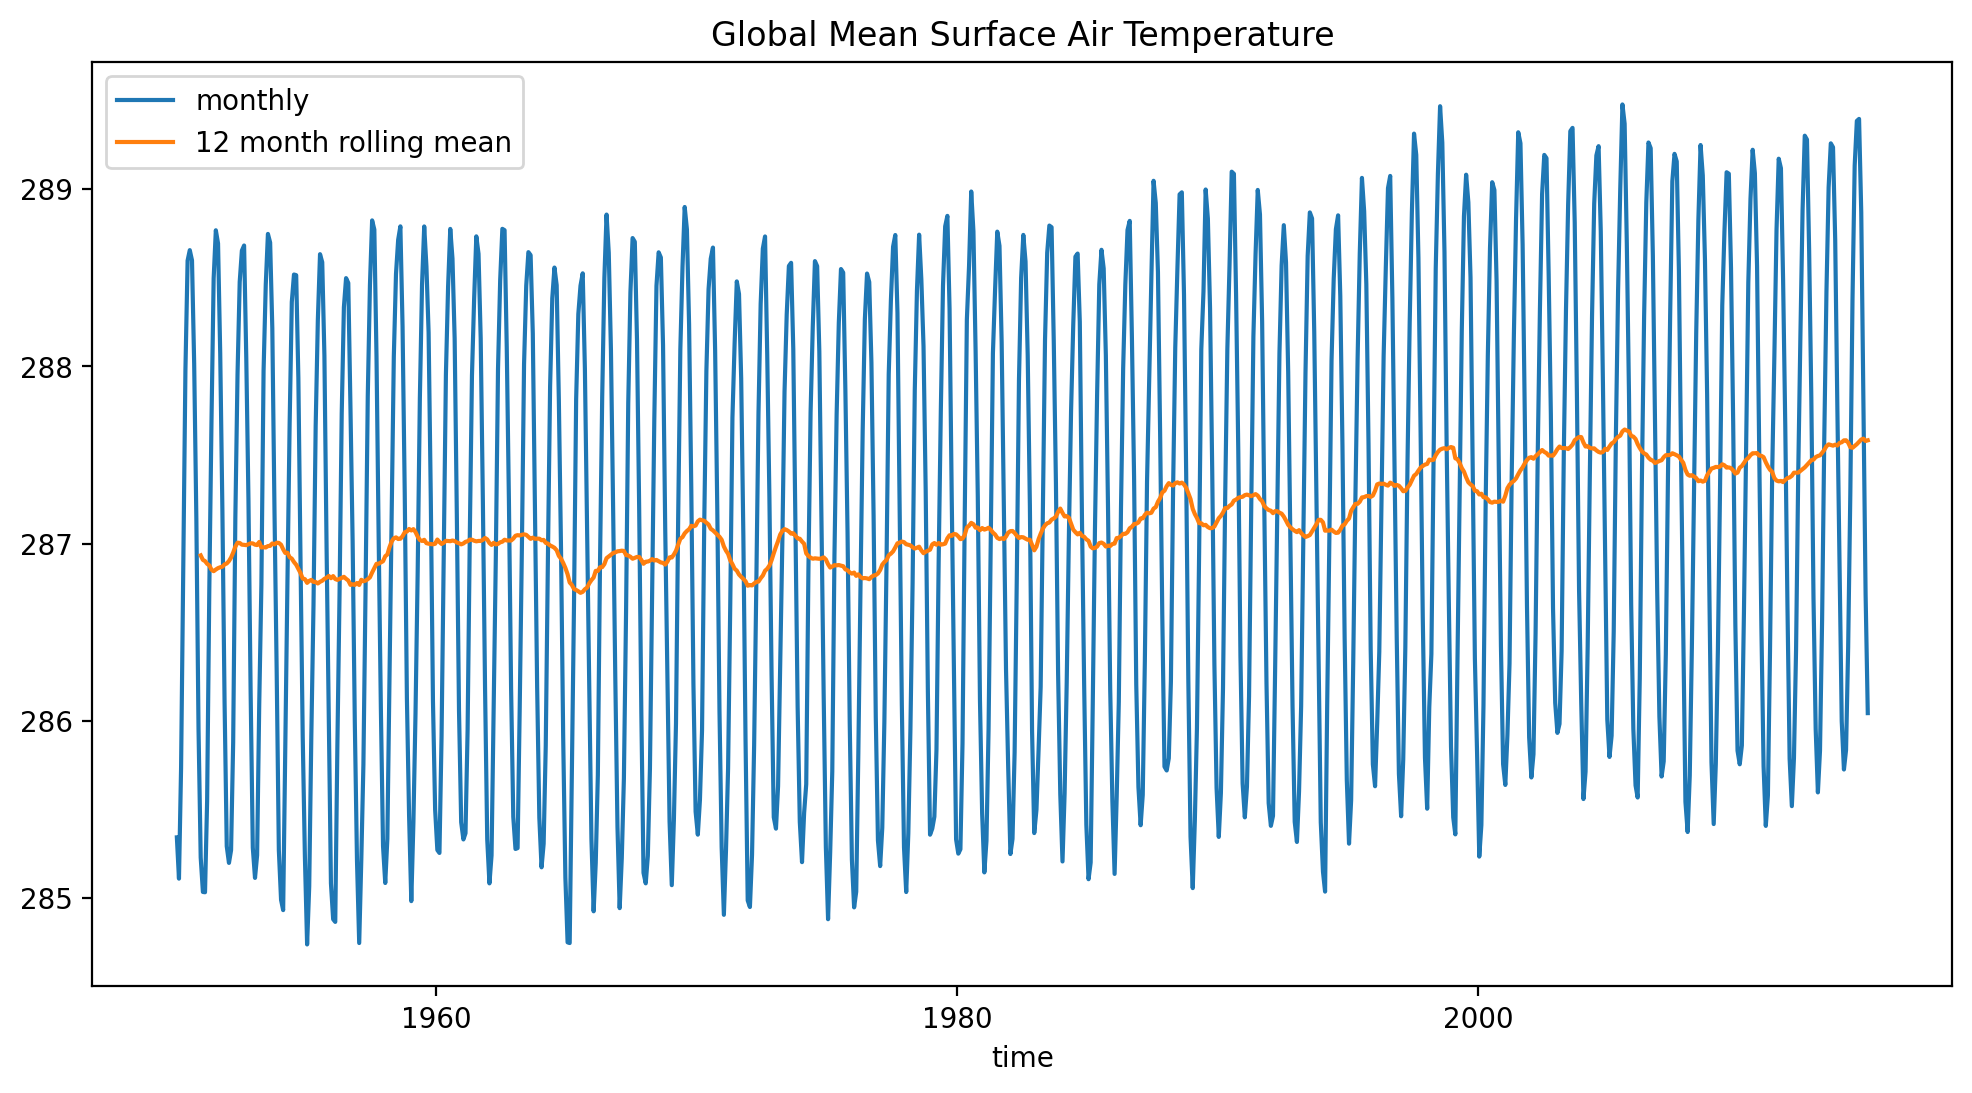

In [ ]:
ta_timeseries.plot(label='monthly')
ta_timeseries.rolling(time=12).mean().plot(label='12 month rolling mean')
plt.legend()
plt.title('Global Mean Surface Air Temperature')

In [ ]:
# df_ta_ncar = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2' & variable_id == 'tas'  & institution_id == 'NCAR'")
df_ta_ncar_his = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2'  & variable_id == 'tas' & institution_id == 'NCAR' & experiment_id == 'historical'")

# get the path to a specific zarr store (the first one from the dataframe above)
zstore_his = df_ta_ncar_his.zstore.values[-1]
print(zstore_his)

# create a mutable-mapping-style interface to the store
mapper_his = fsspec.get_mapper(zstore_his)

# open it using xarray and zarr
ds_his = xr.open_zarr(mapper_his, consolidated=True)
ds_his

gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r11i1p1f1/Amon/tas/gn/v20190514/


<xarray.Dataset>
Dimensions:    (lat: 192, nbnd: 2, lon: 288, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/a7278f6d-6a1b-4050-8f06-a8033604736a...
    version_id:             v20190514

In [ ]:
date_threshold = cftime.DatetimeNoLeap(1950, 1, 1)
ds_his = ds_his.where(ds_his.time > date_threshold, drop=True)
ds_his

<xarray.Dataset>
Dimensions:    (time: 780, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1950-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(780, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/a7278f6d-6a1b-4050-8f06-a8033604736a...
    version_id:             v20190514

Text(0.5, 1.0, 'Global Mean Surface Air Temperature')

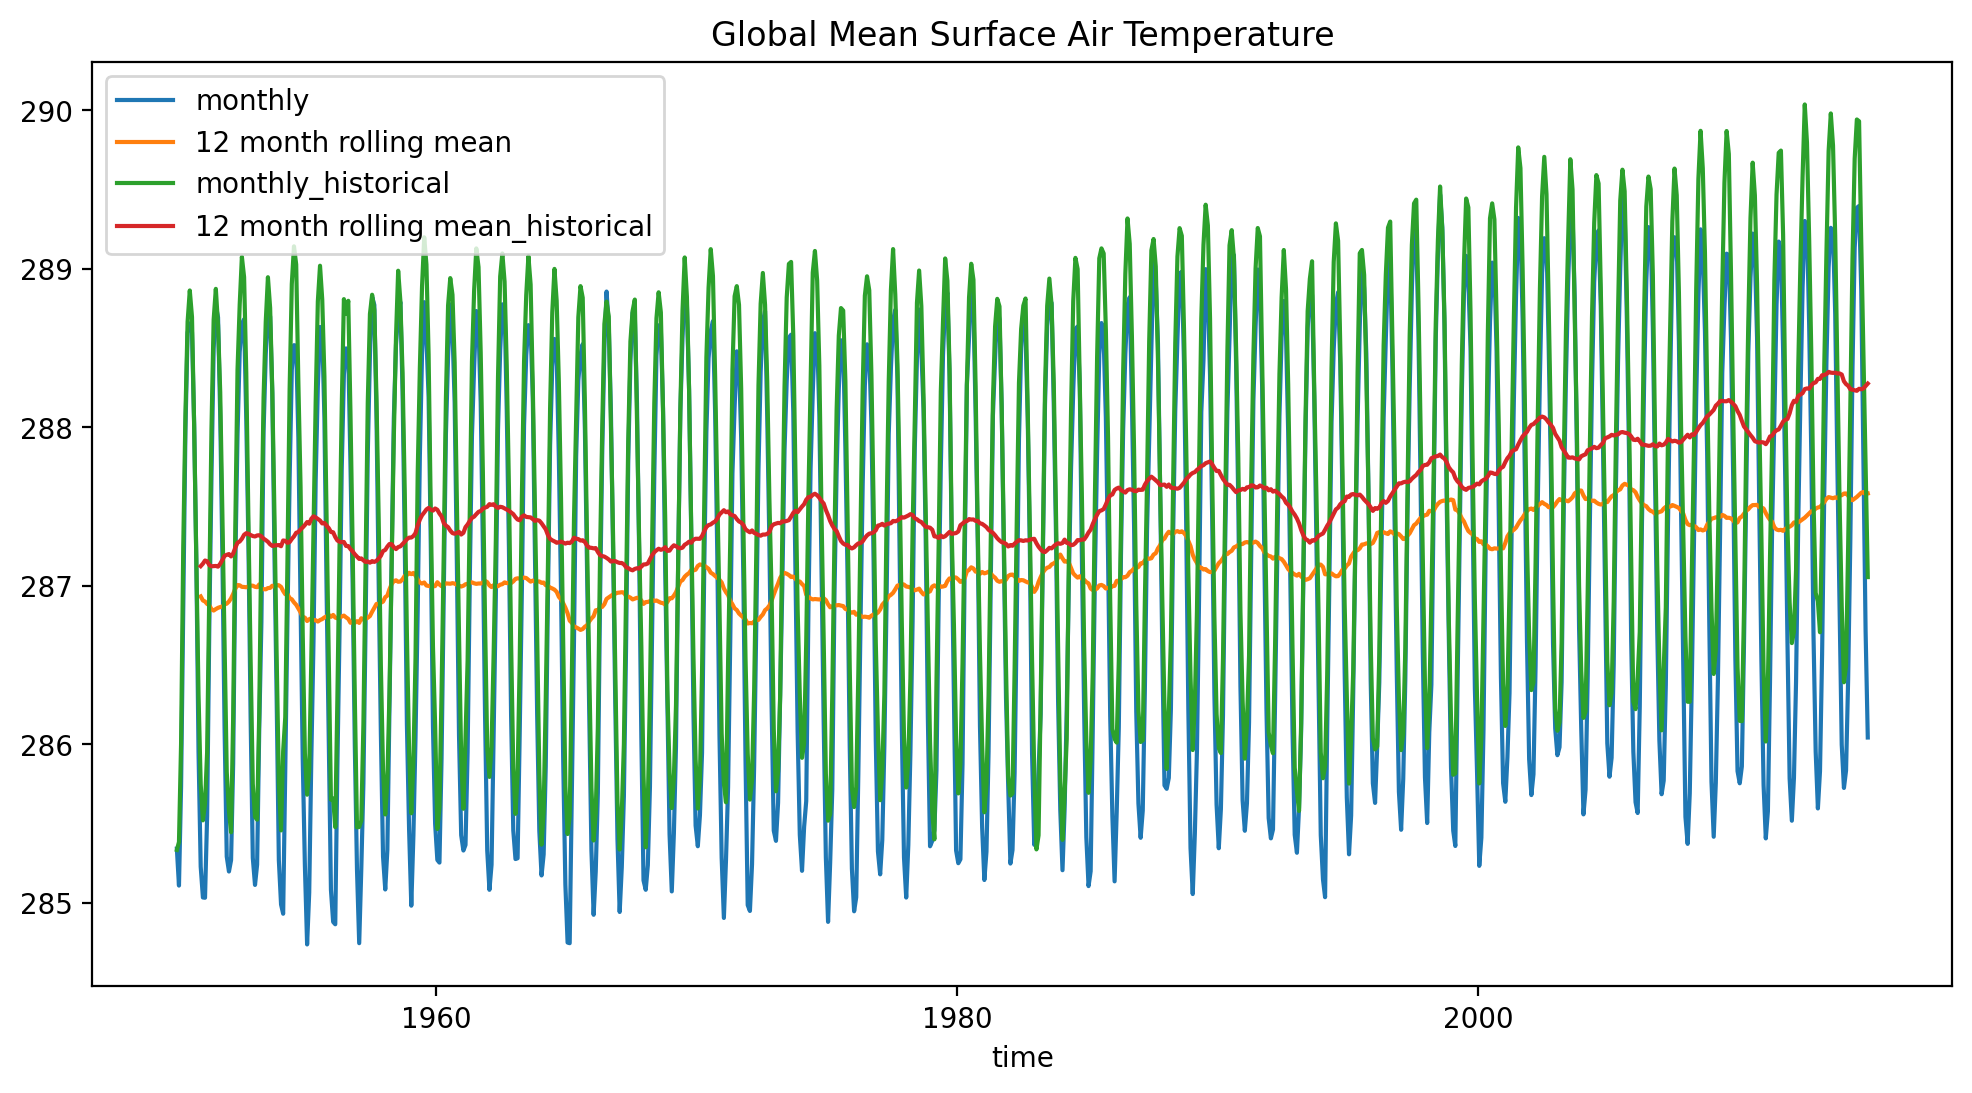

In [ ]:

ta_timeseries_his = (ds_his.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
ta_timeseries.plot(label='monthly')
ta_timeseries.rolling(time=12).mean().plot(label='12 month rolling mean')
ta_timeseries_his.plot(label='monthly_historical')
ta_timeseries_his.rolling(time=12).mean().plot(label='12 month rolling mean_historical')
plt.legend()
plt.title('Global Mean Surface Air Temperature')